In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

In [3]:
file_path = "/content/ICC Mens T20 Worldcup.csv"
df = pd.read_csv(file_path)

In [4]:
# Checking for missing values
df = df.dropna()

In [5]:
# Converting 'Winning Margin' column to numeric
df['Winning Margin'] = pd.to_numeric(df['Winning Margin'], errors='coerce')

In [7]:
df.to_csv('cleaned_ICC_Mens_T20_Worldcup', index=False)

Exploartory Data Analysis

In [8]:
# Venue-wise & team-wise performance analysis
venue_wins = df.groupby("Venue")['Winners'].value_counts().unstack().fillna(0)
teams_wins = df['Winners'].value_counts()

In [9]:
venue_wins

Winners,Afghanistan,Australia,Bangladesh,Canada,England,India,Namibia,Netherlands,New Zealand,Pakistan,Rain,Scotland,South Africa,Sri Lanka,Uganda,United State Of America,West Indies
Venue,,,,,,,,,,,,,,,,,
"Arnos Vale Ground, Kingstown, St Vincent",2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"Brian Lara Stadium, Tarouba, Trinidad",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
"Central Broward Regional Park Stadium Turf Ground, Lauderhill",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
"Daren Sammy National Cricket Stadium, Gros Islet, St Lucia",0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
"Grand Prairie Stadium, Dallas",0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
"Kensington Oval, Bridgetown, Barbados",0.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
"Nassau County International Cricket Stadium, New York",0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
"Providence Stadium, Guyana",3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
"Sir Vivian Richards Stadium, North Sound, Antigua",0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [10]:
teams_wins

,count
Winners,
South Africa,8
India,8
Afghanistan,6
Australia,5
Rain,4
England,4
West Indies,4
Bangladesh,3
United State Of America,2


In [16]:
# Toss impact on match results
toss_impact = df.groupby("Toss Winning")['Winners'].apply(lambda x: (x == x.name).sum())
toss_impact_percentage = (df['Toss Winning'] == df['Winners']).groupby(df['Toss Winning']).mean() * 100

In [17]:
toss_impact, toss_impact_percentage

(Toss Winning
 Afghanistan                3
 Australia                  3
 Bangladesh                 1
 England                    3
 India                      4
 Ireland                    0
 Namibia                    1
 Nepal                      0
 Netherlands                1
 New Zealand                2
 Oman                       0
 Pakistan                   2
 Rain                       3
 Scotland                   0
 South Africa               3
 Sri Lanka                  0
 Uganda                     1
 United State Of America    2
 West Indies                2
 Name: Winners, dtype: int64,
 Toss Winning
 Afghanistan                 60.000000
 Australia                   60.000000
 Bangladesh                  50.000000
 England                     50.000000
 India                      100.000000
 Ireland                      0.000000
 Namibia                     33.333333
 Nepal                        0.000000
 Netherlands                 33.333333
 New Zealand         

In [18]:
# Victory margin trends
df['Winning Margin'] = pd.to_numeric(df['Winning Margin'], errors='coerce')

In [19]:
print(df['Winning Margin'].describe())
print(df['Winning Margin'].isnull().sum())


count     51.000000
mean      22.882353
std       31.727998
min        1.000000
25%        6.000000
50%        8.000000
75%       24.500000
max      134.000000
Name: Winning Margin, dtype: float64
4


In [20]:
df = df[df['Winning Margin'].notna()]
df = df[df['Winning Margin'] > 0]

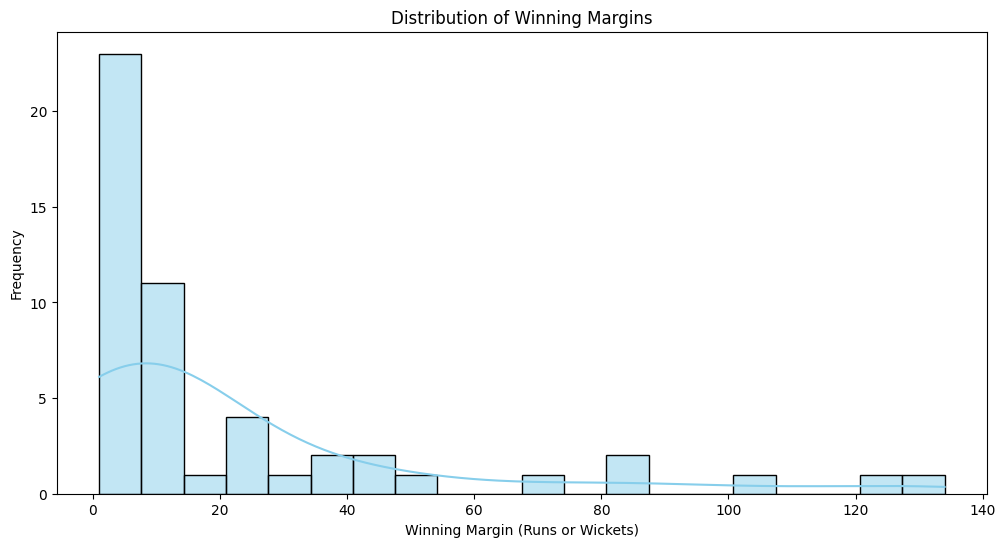

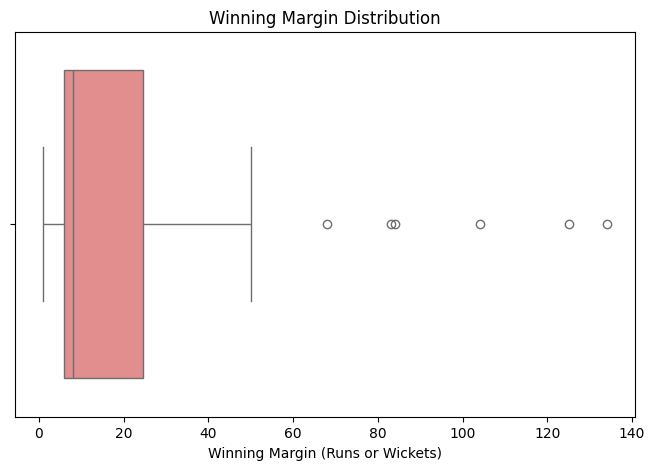

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Winning Margin'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Winning Margins")
plt.xlabel("Winning Margin (Runs or Wickets)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Winning Margin'], color="lightcoral")
plt.title("Winning Margin Distribution")
plt.xlabel("Winning Margin (Runs or Wickets)")
plt.show()

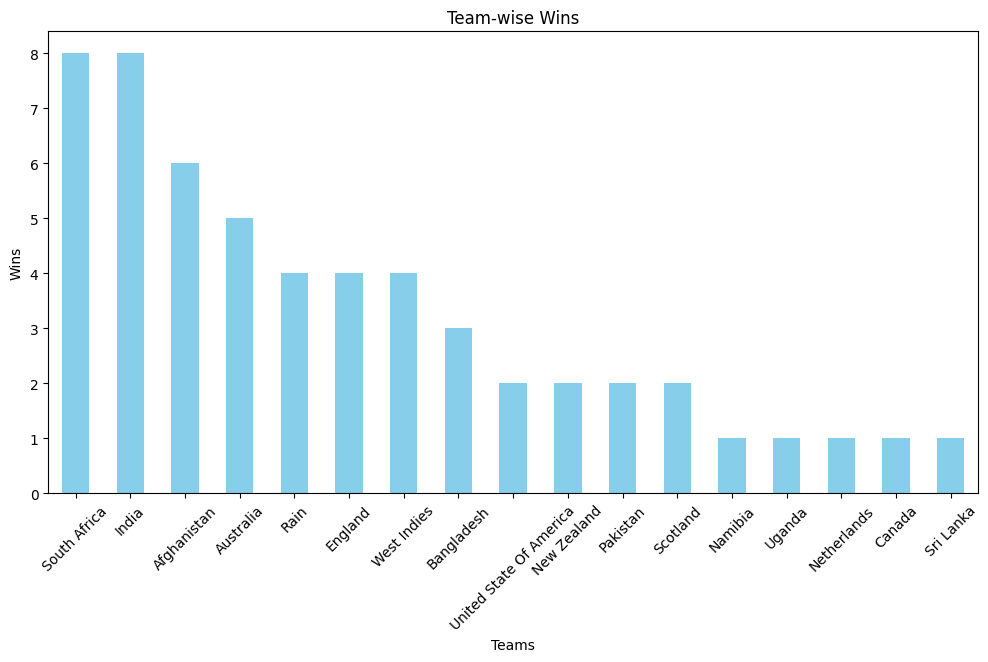

In [22]:
# Visualizations
plt.figure(figsize=(12, 6))
teams_wins.plot(kind='bar', color='skyblue')
plt.title("Team-wise Wins")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.show()

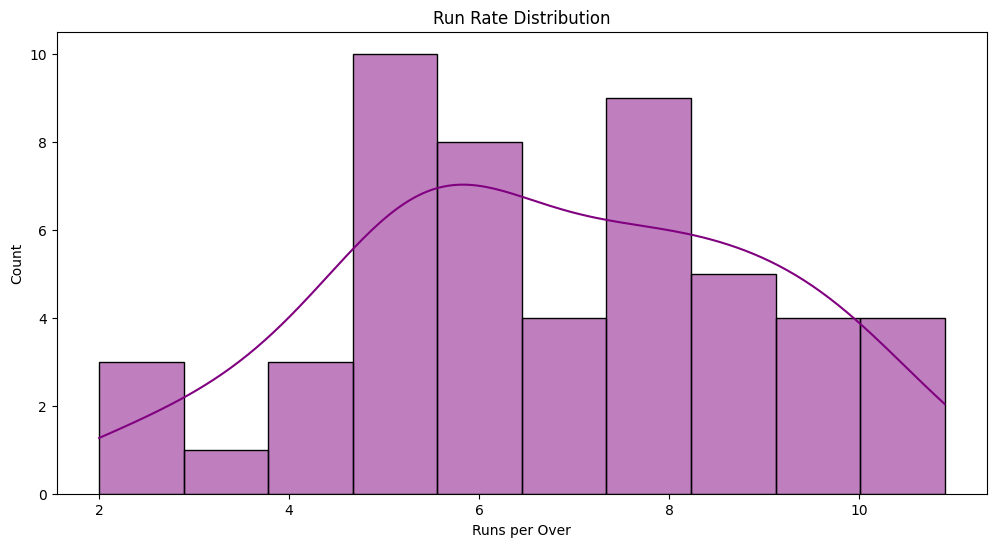

In [44]:
# Runs per over analysis
df['First Innings Score'] = pd.to_numeric(df['First Innings Score'], errors='coerce')
df['Run Rate'] = df['First Innings Score'] / 20
plt.figure(figsize=(12, 6))
sns.histplot(df['Run Rate'], bins=10, kde=True, color='purple')
plt.title("Run Rate Distribution")
plt.xlabel("Runs per Over")
plt.show()

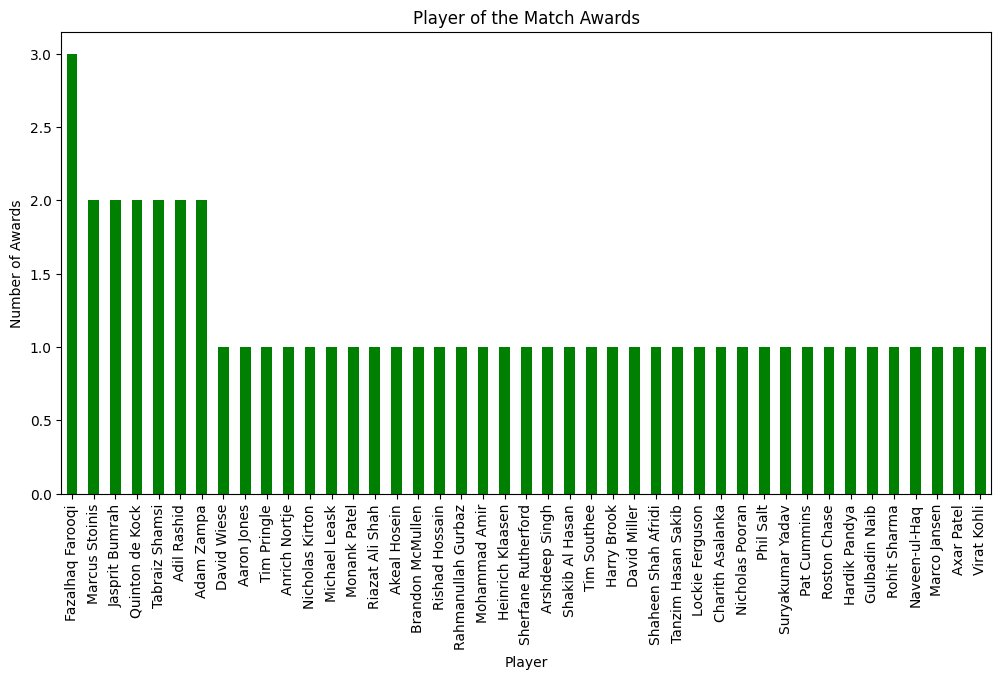

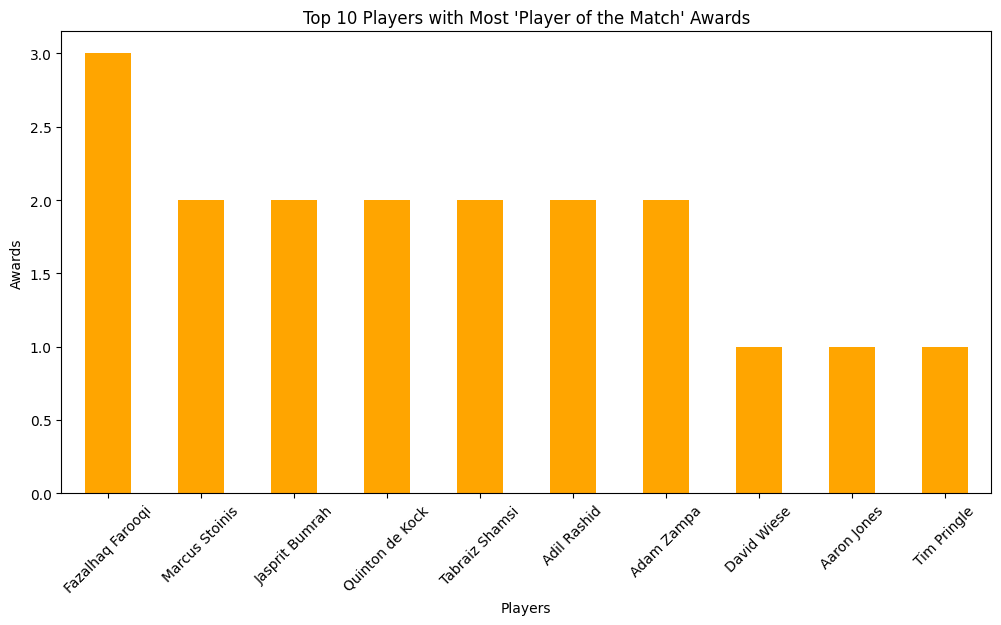

In [51]:
# Player of the match distribution
player_awards = df['Player Of The Match'].value_counts()
plt.figure(figsize=(12, 6))
player_awards[:10].plot(kind='bar', color='orange')
plt.title("Top 10 Players with Most 'Player of the Match' Awards")
plt.xlabel("Players")
plt.ylabel("Awards")
plt.xticks(rotation=45)
plt.show()

Predictive Modeling

In [40]:
# Match Winner Prediction Model
from sklearn.utils import class_weight

le = LabelEncoder()
df['Venue'] = le.fit_transform(df['Venue'])
df['1st Team'] = le.fit_transform(df['1st Team'])
df['2nd Team'] = le.fit_transform(df['2nd Team'])
df['Toss Winning'] = le.fit_transform(df['Toss Winning'])
df['Toss Decision'] = le.fit_transform(df['Toss Decision'])
df['Winners'] = le.fit_transform(df['Winners'])

# Ensure feature consistency
feature_columns = ['Venue', '1st Team', '2nd Team', 'Toss Winning', 'Toss Decision']
X = df[feature_columns]
y = df['Winners']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Match Winner Prediction Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Match Winner Prediction Accuracy: 0.18


In [38]:
# Score Prediction Model
X_score = df[['Venue', '1st Team', '2nd Team']]
y_score = df['First Innings Score']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_score, y_score, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_s, y_train_s)
y_pred_s = reg.predict(X_test_s)
print(f"Score Prediction MAE: {mean_absolute_error(y_test_s, y_pred_s):.2f}")

Score Prediction MAE: 24.42


The low accuracy in match winner prediction is mainly due to missing crucial factors like player form, pitch conditions, and weather, which heavily influence match outcomes. The dataset has a class imbalance, as stronger teams win more often, making predictions biased. Simple label encoding might not fully capture relationships between categorical variables. Cricket matches also have a high degree of unpredictability, making structured data models less effective. Similarly, the score prediction model has a high MAE because it lacks key factors like bowler strength, recent batting performance, and match pressure, which significantly impact total scores.